In [1]:
%load_ext autoreload
%autoreload 2


from inpainter.inpainter import GradientPropagationVideoInpainter, NeighbourVideoInpainter
from inpainter.optical_flow import RAFTOpticalFlowEstimator, LAFCOpticalFlowCompleter
from inpainter.pipeline import VideoInpaintingPipeline
from inpainter.utils import (
    load_data,
    save_frames,
)

import matplotlib.pyplot as plt

propagation_inpainter = GradientPropagationVideoInpainter()
hallucination_inpainter = NeighbourVideoInpainter()
optical_flow_estimator = RAFTOpticalFlowEstimator()
optical_flow_completer = LAFCOpticalFlowCompleter()


pipeline = VideoInpaintingPipeline(
        propagation_inpainter=propagation_inpainter,
        hallucination_inpainter=hallucination_inpainter,
        optical_flow_estimator=optical_flow_estimator,
        optical_flow_completer=optical_flow_completer,
        resolution=(512, 1024),
        flow_propagation_steps=5,
)

In [2]:
frames, masks, names = load_data('crop/frame/', 'crop/mask/')

In [3]:
n = 30
frames, masks, names = frames[:n], masks[:n], names[:n]

In [ ]:
inpainted_frames, _ = pipeline.run(frames, masks)
save_frames('results/', names, inpainted_frames)

Gradient propagation stage 1/5
Optical flows estimation. Forward and backward directaions


  0%|          | 0/29 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272168290/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 29/29 [00:06<00:00,  4.26it/s]


Optical flows completion. Forward and backward directaions


100%|██████████| 30/30 [01:00<00:00,  2.02s/it]


Gradient propagation stage 2/5
Optical flows estimation. Forward and backward directaions


100%|██████████| 29/29 [00:06<00:00,  4.28it/s]


Optical flows completion. Forward and backward directaions


 55%|█████▌    | 16/29 [00:01<00:01, 10.02it/s]

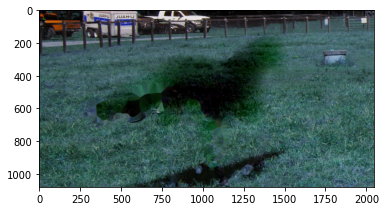

In [5]:
plt.imshow(inpainted_frames[20])

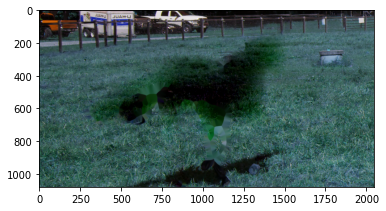

In [6]:
plt.imshow(inpainted_frames[21])

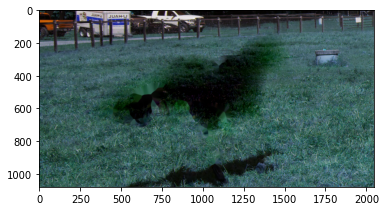

In [7]:
plt.imshow(inpainted_frames[22])